In [35]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

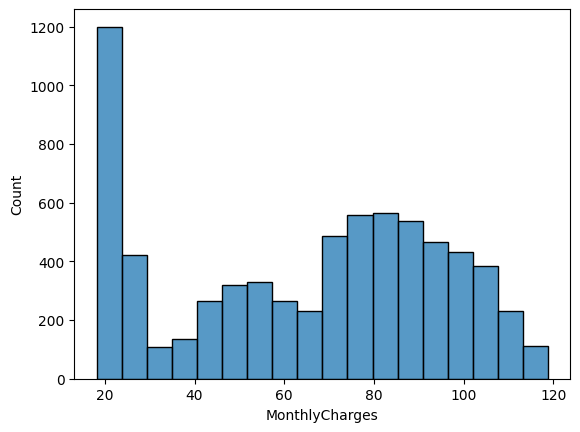

In [42]:
sns.histplot(data=df,x='MonthlyCharges')

In [43]:
contracts = df.groupby('Contract')['customerID'].count()
contracts

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: customerID, dtype: int64

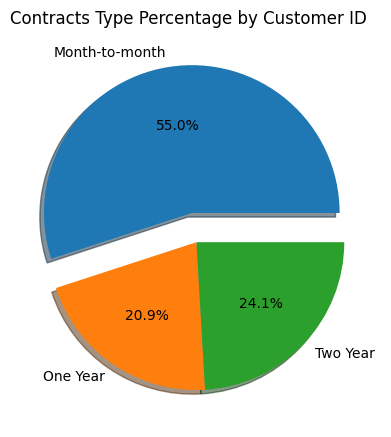

In [44]:
labels = ['Month-to-month','One Year','Two Year']
myexplode = [0.2, 0, 0]
contracts_pie = plt.pie(contracts,labels=labels, explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.suptitle('Contracts Type Percentage by Customer ID',fontsize=12)
plt.show()

In [45]:
tenure_customers = df.groupby('tenure')['customerID'].count()
tenure_customers

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 73, dtype: int64

<Axes: title={'center': 'Customer Counts by Tenures'}, xlabel='tenure', ylabel='Customers Counts'>

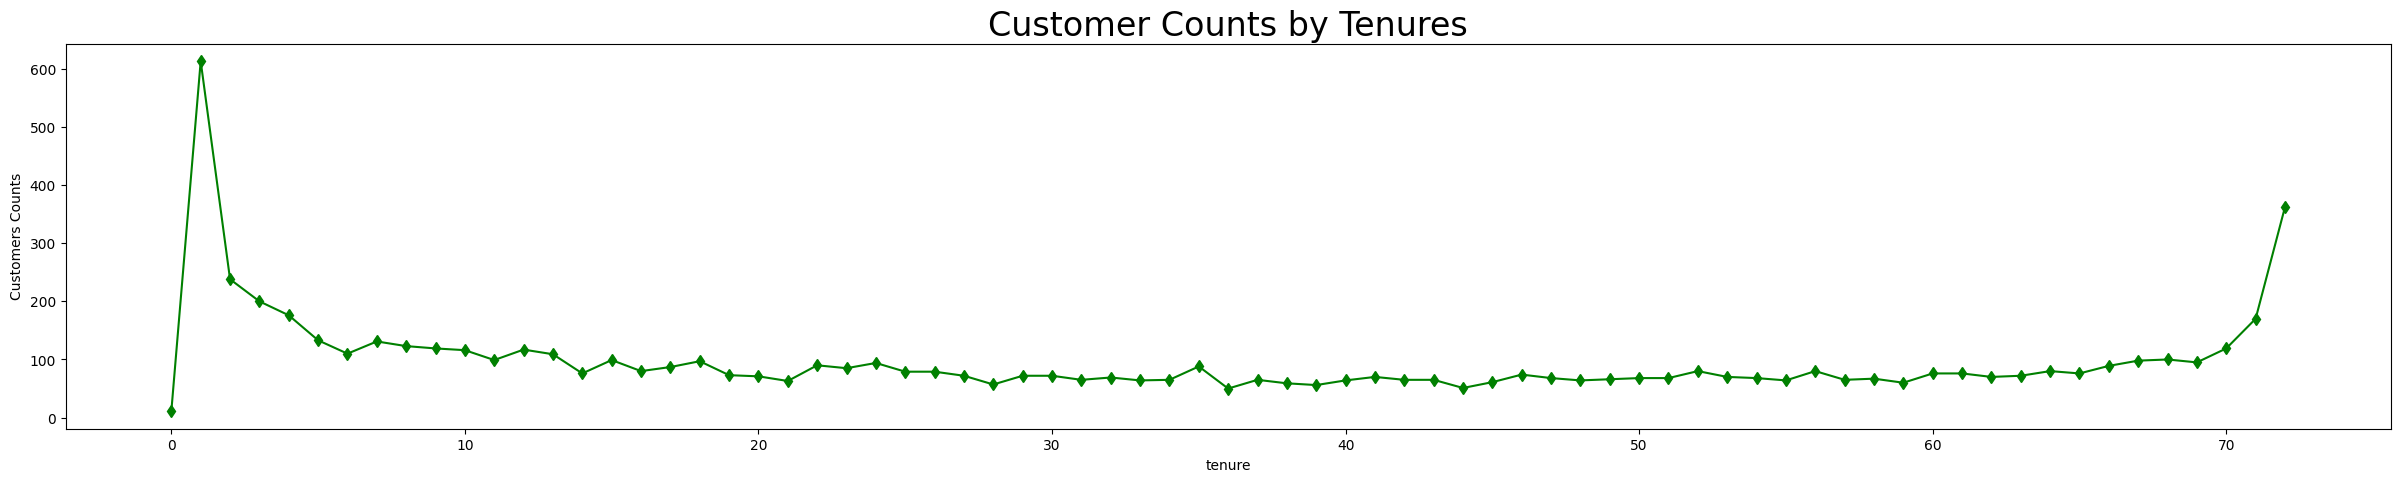

In [46]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.ylabel('Customers Counts')
plt.xlabel('Tenures')
plt.title('Customer Counts by Tenures',fontsize=24)
tenure_customers.plot(color='green',marker='d')

In [47]:
payments = df.groupby('PaymentMethod')['customerID'].count()
print(payments)
payments_mean = df.groupby('PaymentMethod')['MonthlyCharges'].mean()
print(payments_mean)

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: customerID, dtype: int64
PaymentMethod
Bank transfer (automatic)    67.192649
Credit card (automatic)      66.512385
Electronic check             76.255814
Mailed check                 43.917060
Name: MonthlyCharges, dtype: float64


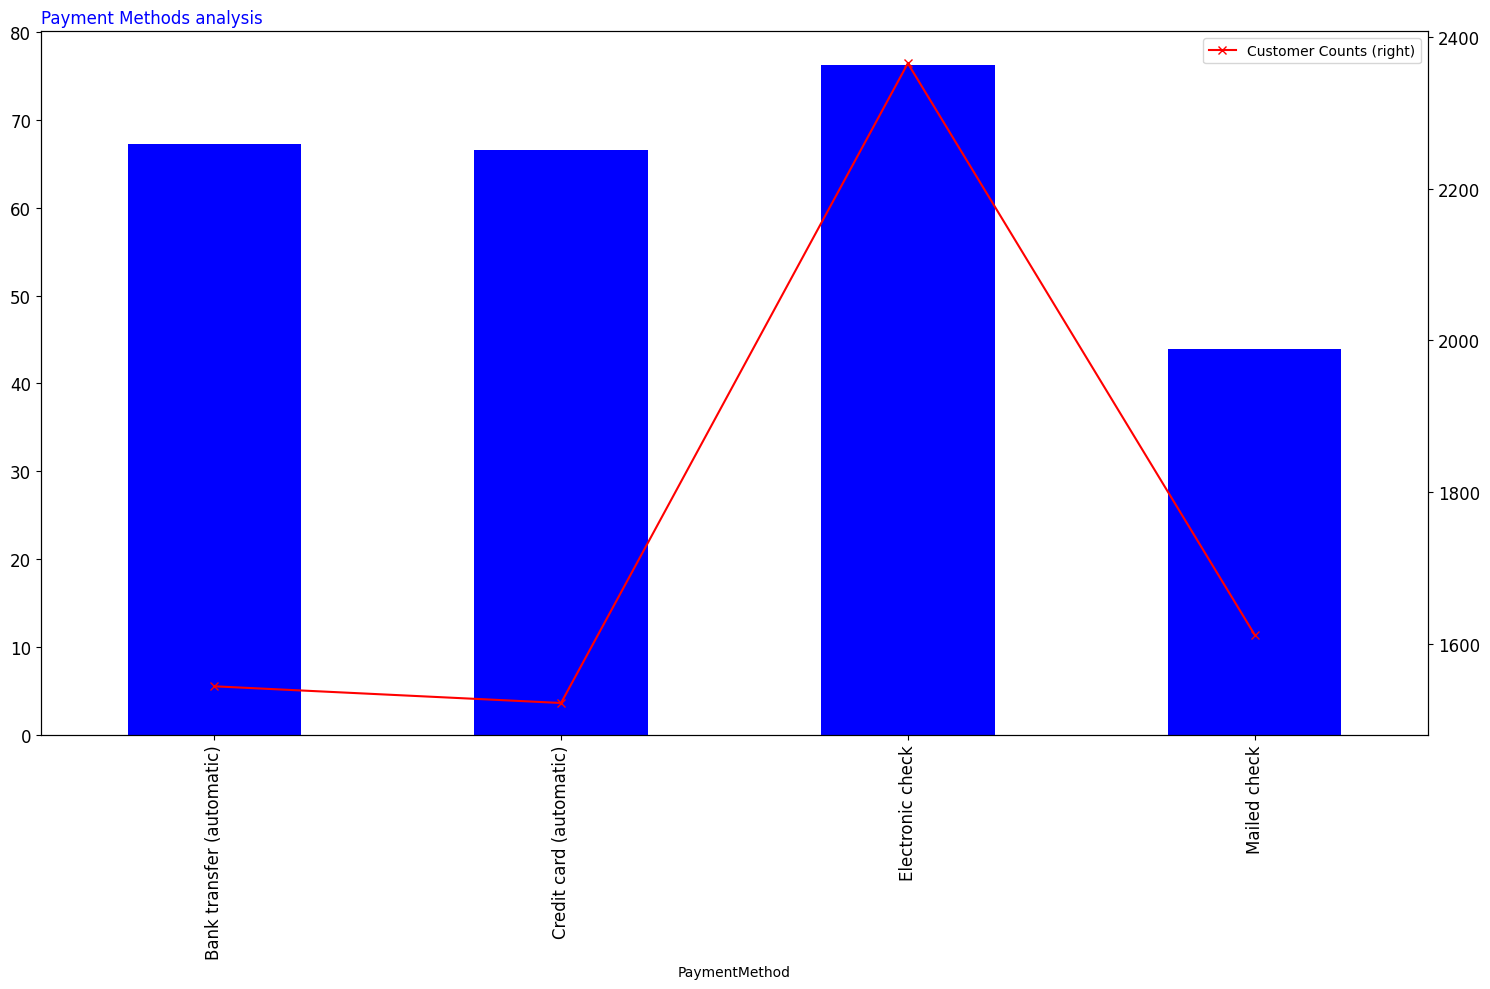

In [48]:
plt.figure(figsize=(15,10))
payments.plot(fontsize=12,label = 'Customer Counts',secondary_y=True,color='red',marker='x')
payments_mean.plot.bar(color='blue',fontsize=12,label = 'Average Monthly Charges')
plt.xlabel('Payment Methods')
plt.title(label='Payment Methods analysis', fontdict={'fontsize': 12, 'color':'blue'}, loc='left')
plt.legend()
plt.tight_layout()

In [49]:
genders = df.groupby('gender')['customerID'].count()
genders

gender
Female    3488
Male      3555
Name: customerID, dtype: int64

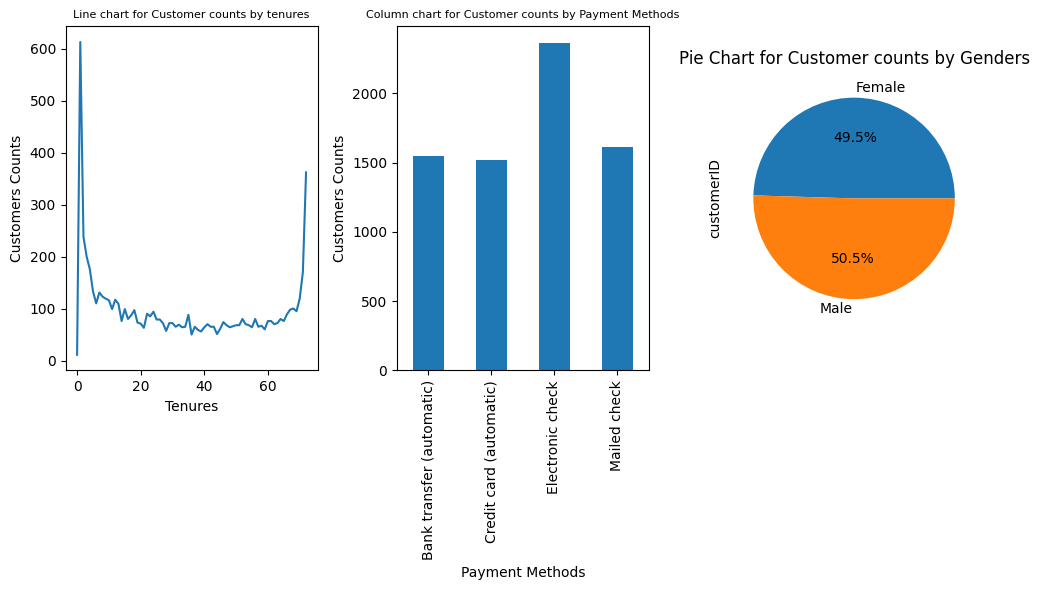

In [50]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
tenure_customers.plot()
plt.xlabel('Tenures')
plt.ylabel('Customers Counts')
plt.title('Line chart for Customer counts by tenures',fontsize=8)

plt.subplot(1, 3, 2)
payments.plot.bar()
plt.xlabel('Payment Methods')
plt.ylabel('Customers Counts')
plt.title('Column chart for Customer counts by Payment Methods',fontsize=8)

plt.subplot(1, 3, 3)
genders.plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Customer counts by Genders')

plt.tight_layout()

# Display the plot
plt.show()